Problem Statement:

Most people can experience occasional feelings of panic or anxiety when they are sick, stressed, or injured, but these feelings often resolve with the situation and don’t usually recur.

If the panic attacks happen often, or last a long time, they can have a very debilitating effect on a person’s life. They can become afraid of having them. They may start to avoid situations they think may trigger an attack, such as leaving home, going to crowded places, or being on their own. They may even have a panic attack about having a panic attack.


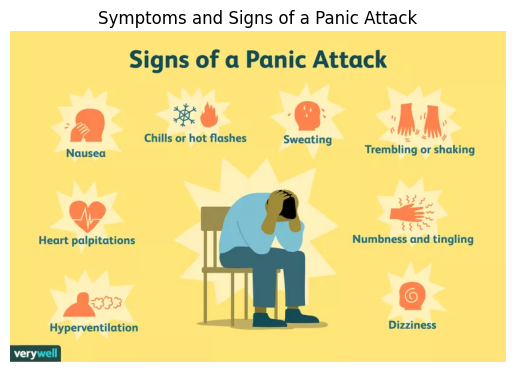

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread(r"C:\test\Panic_Attack_Detection\Model\Image\symptoms-of-panic-attacks- copy.webp")
plt.title("Symptoms and Signs of a Panic Attack")
plt.imshow(image)
plt.axis("off")  
plt.show()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('panic_attack_dataset.csv')
data.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


In [3]:
data.describe

<bound method NDFrame.describe of         ID  Age      Gender  Panic_Attack_Frequency  Duration_Minutes  \
0        1   56      Female                       9                 5   
1        2   46        Male                       8                 9   
2        3   32      Female                       6                31   
3        4   60        Male                       5                20   
4        5   25  Non-binary                       6                10   
...    ...  ...         ...                     ...               ...   
1195  1196   23      Female                       0                11   
1196  1197   41        Male                       0                44   
1197  1198   50        Male                       7                16   
1198  1199   46        Male                       2                17   
1199  1200   60        Male                       4                21   

       Trigger  Heart_Rate Sweating Shortness_of_Breath Dizziness  ...  \
0     Caffeine 

In [4]:
print('Panic_Attack_Frequency_:',data['Panic_Attack_Frequency'].mean())
print('Panic_Score:',data['Panic_Score'].mode())
print('Sleep_Hours:',data['Sleep_Hours'].median())

Panic_Attack_Frequency_: 4.4125
Panic_Score: 0    4
Name: Panic_Score, dtype: int64
Sleep_Hours: 6.5


### Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1078 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake         1200 non-null   

In [6]:
data.isnull().sum()

ID                          0
Age                         0
Gender                      0
Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64

Replace the Null Values in Medical_History to fill it with a different statistic like the average length of the non-null values

In [7]:
mode_v = data['Medical_History'].mode()[0]
data['Medical_History'].fillna(mode_v, inplace=True)


C:\Users\ss876\AppData\Local\Temp\ipykernel_24260\3541702148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Medical_History'].fillna(mode_v, inplace=True)


In [8]:
categorical_columns = ['Gender', 'Trigger', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
                       'Chest_Pain', 'Trembling', 'Medical_History', 'Medication', 'Smoking', 'Therapy']

In [9]:
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

### Feature Encoding and Feature Scaling

Encoding Categorical Variables : It helps in converting categorical features to numeric representations that the model can process because machine learning models cannot directly handle non-numeric data

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder # type: ignore
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[categorical_columns])
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)


In [11]:
import joblib

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [12]:
data = data.drop(categorical_columns, axis=1)
data = pd.concat([data, encoded_df], axis=1)

In [13]:
numerical_columns = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate', 'Caffeine_Intake',
                     'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [14]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [15]:
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # type: ignore
from sklearn.metrics import accuracy_score   

In [16]:
X = data.drop('Panic_Score', axis=1)
y = data['Panic_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
joblib.dump((X_train, X_test, y_train, y_test), 'train_test_data.pkl')


['train_test_data.pkl']

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
import xgboost as xgb 

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

SVR()

In [22]:
joblib.dump(model, 'RandomForest.pkl')
joblib.dump(model, 'SVM.pkl')
joblib.dump(model, 'DecisionTree.pkl')
joblib.dump(model, 'XGBoost.pkl')

['XGBoost.pkl']